# Práctica — EBAC LMS

### 3-4 minutos

¡Bienvenidos a la actividad práctica del módulo!

## Antes de empezar

El objetivo de esta actividad es que efectúes un análisis de clasificación mediante Máquinas de soporte vectorial que permita desarrollar un modelo predictivo basado en distintas métricas aplicadas a una base de datos grande.

**Entregable:** Un Jupyter Notebook (archivo de extensión .ipynb), archivo PDF y capturas de pantalla en el espacio de respuesta que muestren tanto el código desarrollado como la solución al problema planteado, incluyendo los comentarios que sean pertinentes a las preguntas que se plantean. Entregas sin estos elementos no serán calificadas.

¡Buena suerte!

## Paso a paso:

Considere la base de datos "recursos_humanos.csv" sobre empleados que abandonan una empresa.

El objetivo es analizar por qué los empleados deciden irse con la competencia y éste podría ser un desafío serio para un departamento de recursos humanos, el cual se podría abordar mediante modelos predictivos de Machine Learning. Las variables manejadas son:

*   satisfaction_level: Nivel de satisfacción.
*   last_evaluation: Puntaje obtenido en la última evaluación.
*   average_montly_hours: Promedio de horas trabajadas al mes.
*   time_spend_company: Tiempo del usuario en la compañía.
*   work_accident: Si el empleado ha tenido algún accidente laboral (1 = Sí, 0 = No).
*   promotion_last_5years: Si el empleado ha sido promovido en los últimos 5 años.
*   sales: Departamento donde trabaja.
*   salary: Categoría del salario.
*   left: Variable a predecir y si el empleado dejó o no la empresa (1 = Sí, 0 = No).

1.  Cargue la base de datos en Python y asegúrese de re-codificar las variables categóricas de manera pertinente antes de iniciar su análisis (Sugerencia: Use "pd.get_dummies")
2.  Use el método de Máquinas de soporte vectorial para generar un modelo predictivo. Para dicho fin, pruebe los 4 diferentes tipos de Kernel discutidos en esta lección. En cada caso elabore un mapa de calor para las matrices de confusión así como un reporte de clasificación detallado. Interprete verbalmente sus indicadores.
3.  ¿Cuál resultó ser el modelo predictivo más adecuado? Explique su razonamiento.
4.  ¿Qué resultado pronosticaría para un empleado con los siguientes indicadores?

#### 1.  Cargue la base de datos en Python y asegúrese de re-codificar las variables categóricas de manera pertinente antes de iniciar su análisis (Sugerencia: Use "pd.get_dummies")

In [1]:
import utils
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
path = "../data/recursos_humanos.csv"
df = pd.read_csv(path)

X = df.drop(columns=["left", "number_project"], axis=1)
y = df["left"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocess = utils.preprocessing_pipeline(
    X_train, categorical_variables=["sales", "salary"], target="left"
)


X_train_transformed = preprocess.transform(X_train)

#### 2.  Use el método de Máquinas de soporte vectorial para generar un modelo predictivo. Para dicho fin, pruebe los 4 diferentes tipos de Kernel discutidos en esta lección. En cada caso elabore un mapa de calor para las matrices de confusión así como un reporte de clasificación detallado. Interprete verbalmente sus indicadores.

In [3]:
kernels = ["linear", "poly", "rbf", "sigmoid"]

trained_models = {}

confusion_matrices = {}

class_reports = {}

for kernel in kernels:
    model_kernel_label = f"SVC with {kernel} kernel"
    cm, cr, trained_model = utils.evaluate_model_kernel(
        SVC(kernel=kernel, random_state=42), 
        X_train_transformed, 
        y_train, 
        preprocess.transform(X_test), y_test
    )
    confusion_matrices[model_kernel_label] = cm
    class_reports[model_kernel_label] = cr
    trained_models[model_kernel_label] = trained_model
    


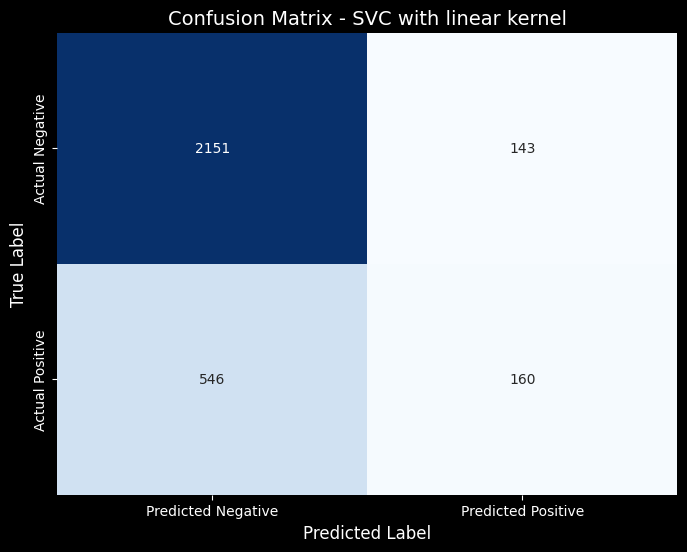

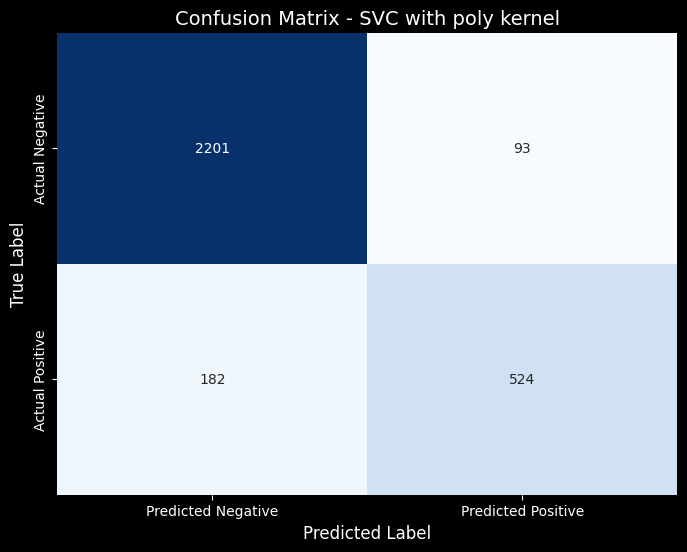

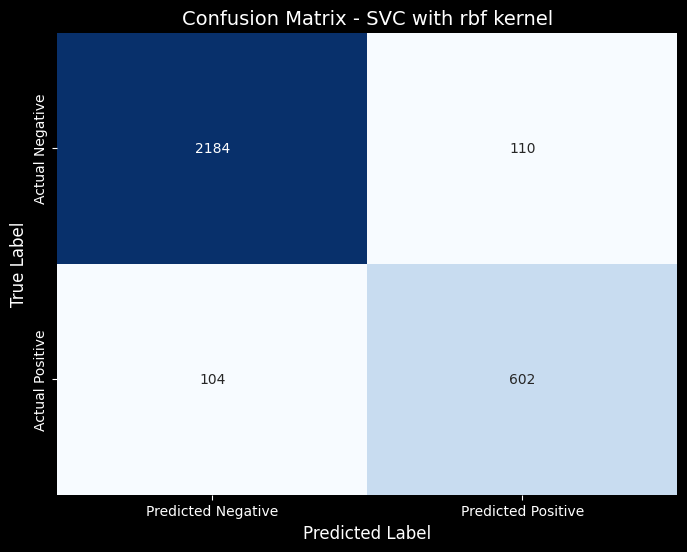

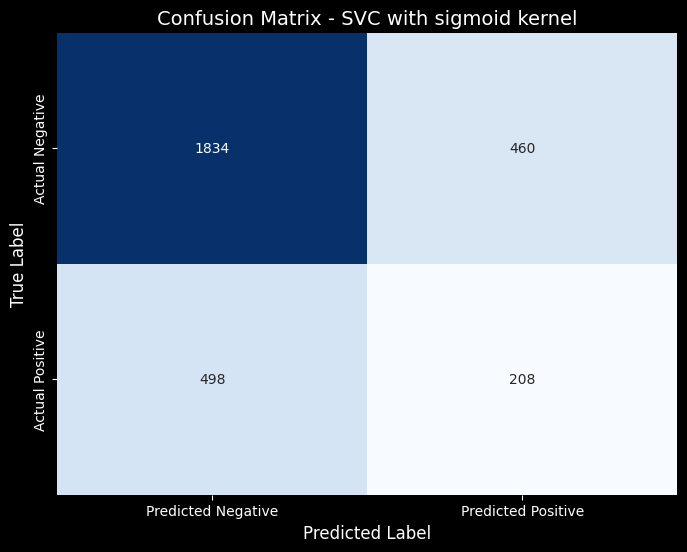

In [4]:
for label, cm in confusion_matrices.items():
    utils.plot_confusion_matrix(cm, model_label=label)

#### 3.  ¿Cuál resultó ser el modelo predictivo más adecuado? Explique su razonamiento.

In [5]:
best_model_name, best_model, best_score = utils.get_best_model(
    trained_models, 
    accuracy_score, 
    preprocess.transform(X_test), 
    y_test
)

print(f"Best model: {best_model_name}")

SVC with linear kernel score: 0.7703333333333333
SVC with poly kernel score: 0.9083333333333333
SVC with rbf kernel score: 0.9286666666666666
SVC with sigmoid kernel score: 0.6806666666666666
Best model: SVC with rbf kernel


Elegiremos el modelo `SVC` con kernel `rbf`, ya que tuvo la mejor puntuación de precisión, pero podremos repetir el análisis con otras métricas. 

4.  ¿Qué resultado pronosticaría para un empleado con los siguientes indicadores?

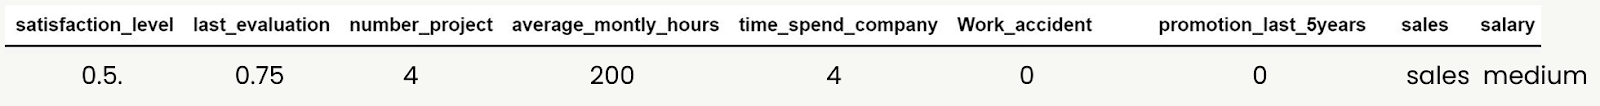

In [6]:
X_test.columns

Index(['satisfaction_level', 'last_evaluation', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales',
       'salary'],
      dtype='object')

In [7]:
values = [0.5, 0.75, 200, 4, 0, 0, "sales", "medium"]

In [8]:
df_test = pd.DataFrame([values], columns=X_test.columns)
df_test 

satisfaction_level  last_evaluation  average_montly_hours  \
0                 0.5             0.75                   200   

   time_spend_company  Work_accident  promotion_last_5years  sales  salary  
0                   4              0                      0  sales  medium

In [9]:
df_transformed = preprocess.transform(df_test)
df_transformed

array([[-0.23342308, -0.23579555, -0.22578001, -0.21283823, -0.24299543,
        -0.25710689,  1.61784591, -0.41542618, -0.47026373, -0.97408353,
         1.14871397, -0.45281438,  0.19706257, -0.02053512,  0.34061666,
        -0.41100307, -0.14998935]])

In [10]:
best_model.predict(df_transformed)

array([0], dtype=int64)

De acuerdo a nuestro mejor modelo, el empleado no dejará la empresa. 